<a href="https://colab.research.google.com/github/WuilsonEstacio/github-para-estadistica/blob/main/estadistical2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# tirar los dados dos veces

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice)  
# puede obtener resultados diferentes ya que ahora imitamos el resultado de lanzar 2 dados, pero el rango debe estar limitado entre 2 y 12

Sum of dice is 8


In [ ]:
# ¡Es tu turno! reemplacemos el none con el código de tirar tres dados, en lugar de dos

np.random.seed(1)  # Esto es para verificar la respuesta, NO modifique esta línea de código

#Modificar el código, reemplazar none
sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]
print('Sum of theree is', sum_of_three_dice)

Sum of theree is 15


In [ ]:
# El siguiente código imita el juego de tirar dados 50 veces. Y todos los resultados se almacenan en "Resultado"
# Intentemos obtener los resultados de 50 sumas de caras.
trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
# imprime los primeros 10 resultados
print(result[:10])

[3, 10, 2, 7, 11, 5, 11, 8, 9, 8]


In [ ]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
print(results[:11])

[5, 9, 10, 11, 3, 8, 7, 8, 4, 4, 10]


In [ ]:
# Este es el código para resumir los resultados de la suma de caras por frecuencia
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print('numb{}, freq{}')
print(sort_freq)

numb{}, freq{}
3      4
4      4
5      5
6      6
7     12
8      7
9      3
10     5
11     3
12     1
Name: 0, dtype: int64


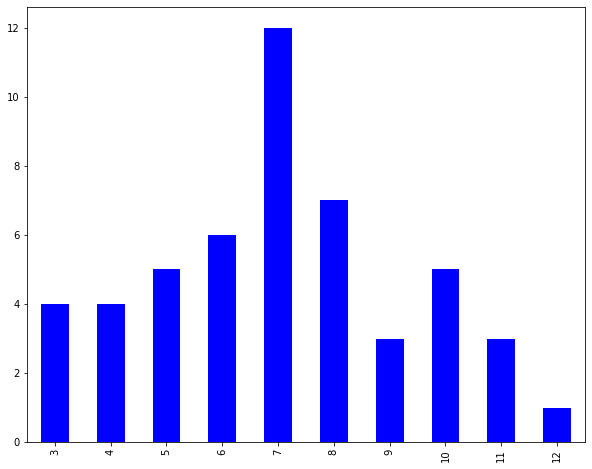

In [ ]:
# trazar la base del gráfico de barras en el resultado

sort_freq.plot (kind = 'bar', color = 'blue', figsize = (10, 8))

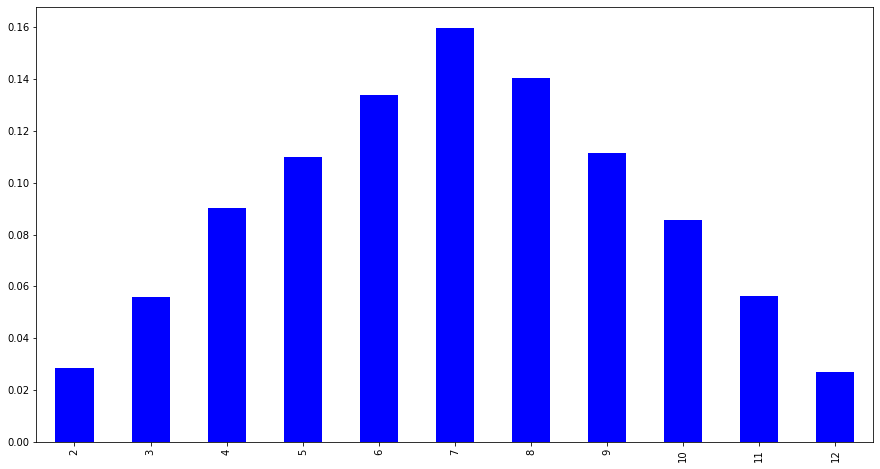

In [ ]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

In [ ]:
# Expectation and Variance of a distribution

# suponga que tenemos dados justos, lo que significa que todas las caras se mostrarán con la misma probabilidad
# entonces podemos decir que conocemos la 'Distribución' de la variable aleatoria - sum_of_dice

X_distri = pd.DataFrame(index=[8, 6, 6, 7, 6, 5, 9, 4, 12, 7, 8]) # esta variable se tiene que hallar primero que se hallo en el paso 73
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
8,0.027778
6,0.055556
6,0.083333
7,0.111111
6,0.138889
5,0.166667
9,0.138889
4,0.111111
12,0.083333
7,0.055556


In [ ]:
# obtencion de  la media y varianza de distribucion. estas pueden describir la distribucion.
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

print('media, = ', mean, 'variaza, = ', var)

media, =  6.8055555555555545 variaza, =  4.60108024691358


In [ ]:
# Media y varianza empírica

# si calculamos la media y la varianza de los resultados (con un número suficientemente alto de ensayos, por ejemplo, 20000).
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [ ]:
# print the mean and variance of the 20000 trials
results = pd.Series(results)
print('media =', results.mean(), ', varianza =', results.var())

media = 7.0087 , varianza = 5.839516285814291


In [ ]:
# Modelos de devolución de existencias

ms = pd.read_csv('/content/microsoft.csv',index_col = 0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [ ]:
# Distribution of Log return
# Permita que juegue con los datos de ms calculando el rendimiento diario del registro
# calcula la diferencia de precio (es decir, "Cierre" de mañana - "Cierre" de hoy)?
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

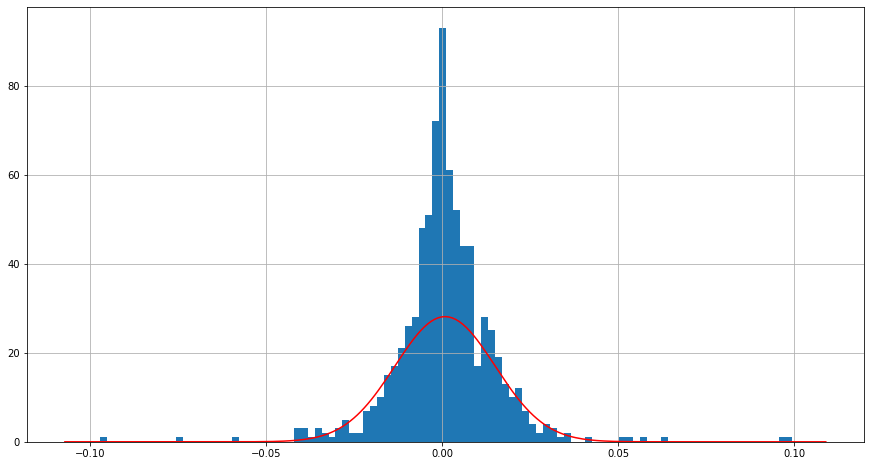

In [ ]:
# Trace un histograma para mostrar la distribución del rendimiento del registro de las acciones de Microsoft.
# Puedes ver que está muy cerca de una distribución normal
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma) # norm.pdf  permite calcular la probability density function

ms['LogReturn'].hist(bins=100, figsize=(15, 8)) # bits me da la resolucion
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [ ]:
#denApp=pd.DataFrame()
#denApp['x']=np.arange(-0.1,0.1,0.0001)
#denApp['pdf']=norm.pdf(denApp['x'],mu,sigma)

#plt.ylim(0,20)
#plt.plot(denApp['x'], denApp['pdf'])
#plt.fill_between(x=np.arange(-0.1,-0.01,0.0001),y2=0,y1=norm.pdf(np.arange(-0.1,0.5,0.0001),mu,sigma),facecolor='pink',alpha=0.5)

In [ ]:
# Calcule la probabilidad de que el precio de las acciones caiga por encima de un cierto porcentaje en un día

# probabilidad de que el precio de las acciones de microsoft caiga más del 5% = 0.05 en un día
prob_return1 = norm.cdf(-0.05, mu, sigma)  # norm.cdf  permite calcular la cumulative distribution function
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [ ]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)  # norm.cdf  permite calcular la cumulative distribution function
print('The Probability is ', prob_return1)

The Probability is  6.056775634858521e-13


In [ ]:
# Calcule la probabilidad de que el precio de las acciones caiga por encima de un cierto porcentaje en un año.

# drop over 40% in 220 days  caer mas del 40% en 220 dias
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [ ]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = None
print('The probability of dropping over 20% in 220 days is ', norm.cdf(-0.2, mu220, sigma220))

The probability of dropping over 20% in 220 days is  0.03535237727490905


In [ ]:
# caer mas del 40% en 30 dias
mu30 = 30*mu
sigma30 = (30**0.5) * sigma
print('La probabilidad de caer más del 12% en 30 días es ', norm.cdf(-0.12, mu220, sigma220))

La probabilidad de caer más del 12% en 30 días es  0.07674365258613194


In [ ]:
# Calcular valor en riesgo (VaR)
# es una técnica estadística para medir el riesgo financiero de una inversión. Indica la probabilidad (normalmente 1% o 5%)...
# de sufrir una determinada pérdida durante un periodo de tiempo  https://economipedia.com/definiciones/valor-en-riesgo-var.html
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is', VaR)

Single day value at risk is -0.022523362407065


In [ ]:
# Quatile = cuartil
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [ ]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006
